In [42]:
import sys
if '.' not in sys.path:
    sys.path.append('.')

from time import sleep
import numpy as np
import gym

import gymEnvs
from util import *
from smallmdp import *
%config IPCompleter.greedy=True
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# VALUE ITERATION

In [43]:
gamma=0.9
theta=1e-3
gambler = Gambler()
VI_pi, VI_V, VI_deltas, VI_mainLoopCounter, VI_duration = sbvaliter(gambler, gamma, theta)

Total iterations:67 Duration:0.005069732666015625
dict_values([0, 1, 2, 3, 4, 5, 4, 3, 2, 1, 0])


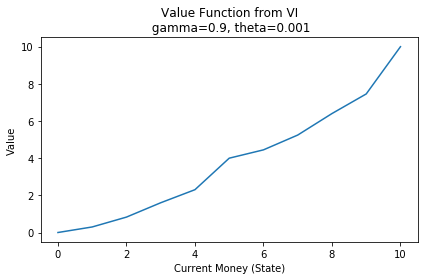

In [44]:
plt.plot(list(VI_V.values()))
plt.xlabel("Current Money (State)")
plt.ylabel("Value")
plt.title("Value Function from VI\n gamma={}, theta={}".format(gamma, theta))
plt.tight_layout()
plt.savefig("./Figures/gambler_VI_valfunc.png")

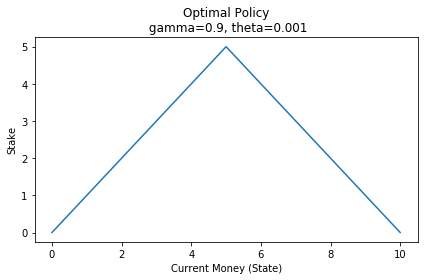

In [45]:
plt.plot(list(VI_pi.values()))
plt.xlabel("Current Money (State)")
plt.ylabel("Stake")
plt.title("Optimal Policy\n gamma={}, theta={}".format(gamma, theta))
plt.tight_layout()
plt.savefig("./Figures/gambler_VI_policy.png")

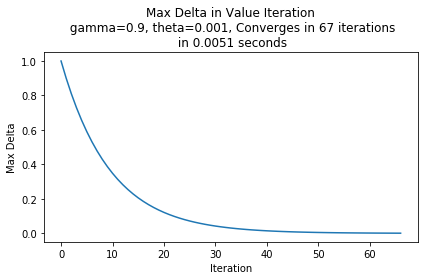

In [46]:
plt.plot(VI_deltas)
plt.xlabel("Iteration")
plt.ylabel("Max Delta")
plt.title("Max Delta in Value Iteration\n gamma={}, theta={}, Converges in {} iterations\n in {} seconds".format(gamma, theta, VI_mainLoopCounter, round(VI_duration,4)))
plt.tight_layout()
plt.savefig("./Figures/gambler_VI_maxdelta.png")

# POLICY ITERATION

In [47]:
gambler = Gambler()
gamma=0.9
theta=1e-3
PI_pi, PI_V, PI_deltas, polstable, PI_mainLoopCounter, PI_duration = sbpoliter(gambler, gamma, theta)

dict_values([0, 1, 2, 3, 4, 5, 4, 3, 2, 1, 0])
Total iterations:2 Duration:0.0018489360809326172


In [97]:
polstable

True

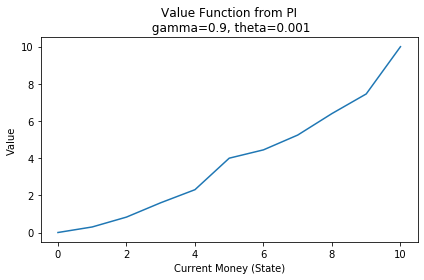

In [92]:
plt.plot(list(PI_V.values()))
plt.xlabel("Current Money (State)")
plt.ylabel("Value")
plt.title("Value Function from PI\n gamma={}, theta={}".format(gamma, theta))
plt.tight_layout()
plt.savefig("./Figures/gambler_PI_valfunc.png")

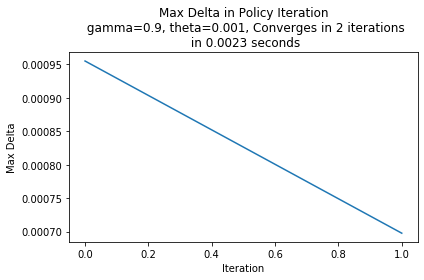

In [98]:
plt.plot(PI_deltas)
plt.xlabel("Iteration")
plt.ylabel("Max Delta")
plt.title("Max Delta in Policy Iteration\n gamma={}, theta={}, Converges in {} iterations\n in {} seconds".format(gamma, theta, PI_mainLoopCounter, round(PI_duration,4)))
plt.tight_layout()
plt.savefig("./Figures/gambler_PI_maxdelta.png")

# They converge to the same policy

In [57]:
PI_pi==VI_pi

True

# QLEARNING

In [4]:
alpha=1
epsilon=1
gamma=0.999
epsilon_decay=0.9999999
alpha_decay=0.9999999
max_iter=10000000
q, q_maxDeltas, q_rewards, q_episodeLengths, q_times = qlearning(gambler,max_iter, alpha=alpha, epsilon=epsilon, gamma=gamma, epsilon_decay=epsilon_decay, alpha_decay=alpha_decay, max_steps=10000)
q_pi = []
for s in gambler.allPossibleStates():
    best = max(gambler.availableActions(s), key=lambda a1: q[s, a1])
    q_pi.append(best)

Episode:1000000
Episode:2000000
Episode:3000000
Episode:4000000
Episode:5000000
Episode:6000000
Episode:7000000
Episode:8000000
Episode:9000000


# RESULTING POLICY FROM QLEARNING

In [5]:
q_pi

[0, 1, 2, 3, 1, 1, 1, 1, 1, 2, 0]

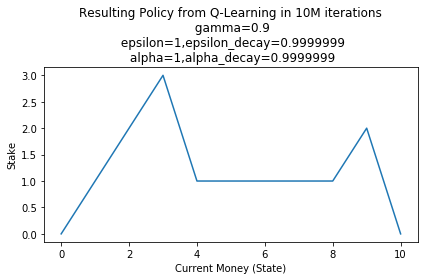

In [35]:

plt.plot(q_pi)
plt.xlabel("Current Money (State)")
plt.ylabel("Stake")
plt.title("Resulting Policy from Q-Learning in 10M iterations\n gamma={}\n epsilon={},epsilon_decay={}\n alpha={},alpha_decay={}".format(gamma, epsilon, epsilon_decay, alpha, alpha_decay))
plt.tight_layout()
plt.savefig("./Figures/gambler_q_policy_10M.png")

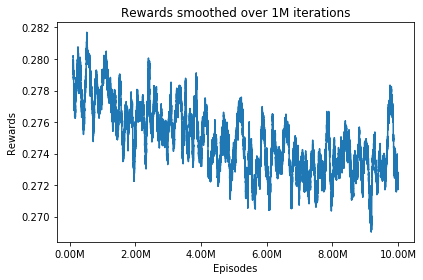

In [32]:
import matplotlib.ticker as ticker
plt.plot(pd.Series(q_rewards).rolling(100000,100000).mean())
plt.xlabel("Episodes")
plt.ylabel("Rewards")
plt.title("Rewards smoothed over 1M iterations")
plt.gca().xaxis.set_major_formatter(ticker.FuncFormatter(lambda x, pos: '{:,.2f}'.format(x/1000000) + 'M'))
plt.tight_layout()
plt.savefig("./Figures/gambler_q_rewards_10M.png")

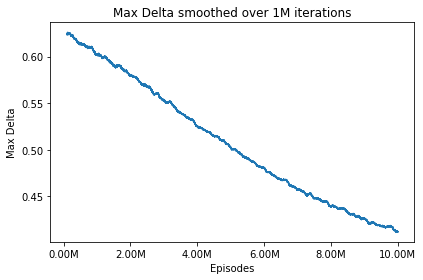

In [36]:
import matplotlib.ticker as ticker
plt.plot(pd.Series(q_maxDeltas).rolling(100000,100000).mean())
plt.xlabel("Episodes")
plt.ylabel("Max Delta")
plt.title("Max Delta smoothed over 1M iterations")
plt.gca().xaxis.set_major_formatter(ticker.FuncFormatter(lambda x, pos: '{:,.2f}'.format(x/1000000) + 'M'))
plt.tight_layout()
plt.savefig("./Figures/gambler_q_maxdelta_10M.png")

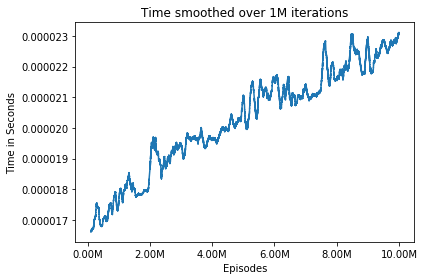

In [37]:
import matplotlib.ticker as ticker
plt.plot(pd.Series(q_times).rolling(100000,100000).mean())
plt.xlabel("Episodes")
plt.ylabel("Time in Seconds")
plt.title("Time smoothed over 1M iterations")
plt.gca().xaxis.set_major_formatter(ticker.FuncFormatter(lambda x, pos: '{:,.2f}'.format(x/1000000) + 'M'))
plt.tight_layout()
plt.savefig("./Figures/gambler_q_time_10M.png")

# SCORING

# RANDOM POLICY

In [16]:
rews=[]
avgsteps=[]
for i in range(1000):
    pol = randomPolicy()
    for initialMoney in range(1,10):        
        steps, rew=score(pol, initialMoney, 1000)
        avgsteps.append(np.array(steps).mean())
        rews.append(rew)
rewsmean = np.array(rews).mean()
avgavgsteps = np.array(avgsteps).mean()

In [17]:
avgavgsteps,rewsmean

(3.3963084444444442, 273.744)

# POLICY FROM PI/VI

In [48]:
rews_opt=[]
avgsteps_opt=[]
for initialMoney in range(1,10):
    stepsToReachGoal, totalWins = score(PI_pi, initialMoney, 1000)
    avgsteps_opt.append(np.array(stepsToReachGoal).mean())
    rews_opt.append(totalWins)

opt_rew_mean = np.array(rews_opt).mean()
opt_avgavgsteps = np.array(avgsteps_opt).mean()

In [49]:
opt_avgavgsteps, opt_rew_mean

(2.4019336652959735, 391.44444444444446)

# POLICY FROM QLEARNING

In [50]:
rews_q=[]
avgsteps_q=[]
for initialMoney in range(1,10):
    stepsToReachGoal, totalWins = score(q_pi, initialMoney, 1000)
    avgsteps_q.append(np.array(stepsToReachGoal).mean())
    rews_q.append(totalWins)

q_rew_mean = np.array(rews_q).mean()
q_avgavgsteps = np.array(avgsteps_q).mean()

In [51]:
q_avgavgsteps, q_rew_mean

(15.461964504524287, 196.22222222222223)